# Bollywood Movie Analysis (1950-2019)

We've taken our data from https://www.kaggle.com/pncnmnp/the-indian-movie-database

Being an avid follower of Bollywood movies from my childhood, I've always been fascinated by the range of movies that may come out of the same industry. As part of this project I just wanted to get a glimpse of a holistic picture of quality vs popularity and if there lies a fine line where they can both converge be it for the briefest of moments.

I've used pandas, matplotlib, seaborn and scikit-learn for the analysis. It's needless to mention the cool jovian library which has made the version control seemless for this project. I would also like to thank Binder for the wonderful online platform that they provide.

In [225]:
project_name = "sixty-nine-years-of-bollywood" 

In [226]:
!pip install jovian --upgrade -q

In [227]:
import jovian

In [228]:
jovian.commit(project=project_name)

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "sohinidas1092/sixty-nine-years-of-bollywood" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ml/sohinidas1092/sixty-nine-years-of-bollywood


'https://jovian.ml/sohinidas1092/sixty-nine-years-of-bollywood'

## Data Preparation and Cleaning



**We import pandas to perform the analysis in python as Pandas is a high-level data manipulation tool developed by Wes McKinney. It is built on the Numpy package and its key data structure is called the DataFrame.**

In [229]:
import pandas as pd

**We load the bollywood full data set(1950-2019) to get a view of the detailed data frame.**

In [230]:
bolly_full_data_df = pd.read_csv('bollywood_full_1950-2019.csv')
bolly_full_data_df

,title_x,imdb_id,poster_path,wiki_link,title_y,original_title,is_adult,year_of_release,runtime,genres,imdb_rating,imdb_votes,story,summary,tagline,actors,wins_nominations,release_date
0,Uri: The Surgical Strike,tt8291224,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Uri:_The_Surgica...,Uri: The Surgical Strike,Uri: The Surgical Strike,0,2019,138,Action|Drama|War,8.4,35112.0,Divided over five chapters the film chronicle...,Indian army special forces execute a covert op...,NaN,Vicky Kaushal|Paresh Rawal|Mohit Raina|Yami Ga...,4 wins,11 January 2019 (USA)
1,Battalion 609,tt9472208,NaN,https://en.wikipedia.org/wiki/Battalion_609,Battalion 609,Battalion 609,0,2019,131,War,4.1,73.0,The story revolves around a cricket match betw...,The story of Battalion 609 revolves around a c...,NaN,Vicky Ahuja|Shoaib Ibrahim|Shrikant Kamat|Elen...,NaN,11 January 2019 (India)
2,The Accidental Prime Minister (film),tt6986710,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/The_Accidental_P...,The Accidental Prime Minister,The Accidental Prime Minister,0,2019,112,Biography|Drama,6.1,5549.0,Based on the memoir by Indian policy analyst S...,Explores Manmohan Singh's tenure as the Prime ...,NaN,Anupam Kher|Akshaye Khanna|Aahana Kumra|Atul S...,NaN,11 January 2019 (USA)
3,Why Cheat India,tt8108208,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Why_Cheat_India,Why Cheat India,Why Cheat India,0,2019,121,Crime|Drama,6.0,1891.0,The movie focuses on existing malpractices in ...,The movie focuses on existing malpractices in ...,NaN,Emraan Hashmi|Shreya Dhanwanthary|Snighdadeep ...,NaN,18 January 2019 (USA)
4,Evening Shadows,tt6028796,NaN,https://en.wikipedia.org/wiki/Evening_Shadows,Evening Shadows,Evening Shadows,0,2018,102,Drama,7.3,280.0,While gay rights and marriage equality has bee...,Under the 'Evening Shadows' truth often plays...,NaN,Mona Ambegaonkar|Ananth Narayan Mahadevan|Deva...,17 wins & 1 nomination,11 January 2019 (India)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4325,Samadhi (1950 film),tt0268614,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Samadhi_(1950_film),Samadhi,Samadhi,0,1950,165,Drama,6.1,21.0,The story is based on the true incident at INA...,The story is based on the true incident at INA...,NaN,Ashok Kumar|Nalini Jaywant|Kuldip Kaur|Shyam|M...,NaN,NaN
4326,Sangram (1950 film),tt0244182,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Sangram_(1950_film),Sangram,Sangram,0,1950,139,Drama,6.2,20.0,After the death of his wife a policeman fails...,After the death of his wife a policeman fails...,NaN,Ashok Kumar|Nalini Jaywant|Nawab|Sajjan|Tiwari...,NaN,NaN
4327,Sargam (1950 film),tt0269826,NaN,https://en.wikipedia.org/wiki/Sargam_(1950_film),Melody,Sargam,0,1950,135,Drama|Family,6.8,21.0,NaN,Add a Plot »,NaN,Raj Kapoor|Rehana|Om Prakash|David Abraham|Rad...,NaN,4 February 1957 (Iran)
4328,Sheesh Mahal (1950 film),tt0243555,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Sheesh_Mahal_(19...,Sheesh Mahal,Sheesh Mahal,0,1950,144,Drama,7.0,13.0,Thakur Jaspal Singh lives in the prestigious a...,Thakur Jaspal Singh lives in the prestigious a...,NaN,Sohrab Modi|Naseem Banu|Pushpa Hans|Nigar Sult...,NaN,NaN


**To handle the missing values, we try to find where they lie.** 

In [231]:
bolly_full_data_df.isna()

,title_x,imdb_id,poster_path,wiki_link,title_y,original_title,is_adult,year_of_release,runtime,genres,imdb_rating,imdb_votes,story,summary,tagline,actors,wins_nominations,release_date
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
1,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False
4,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4325,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,True
4326,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,True
4327,False,False,True,False,False,False,False,False,False,False,False,False,True,False,True,False,True,False
4328,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,True


**While handling the missing values of tagline column we experienced 84 percent of NaN values and hence decided to drop the column.**

In [232]:
count = bolly_full_data_df["tagline"].isna().sum()
# count = bolly_full_data_df[bolly_full_data_df["tagline"].isna()].sum()

In [233]:
count

3645

In [234]:
3645/4330

0.8418013856812933

In [235]:
bolly_full_data_df = bolly_full_data_df.drop(['tagline'], axis=1)

In [236]:
bolly_full_data_df

,title_x,imdb_id,poster_path,wiki_link,title_y,original_title,is_adult,year_of_release,runtime,genres,imdb_rating,imdb_votes,story,summary,actors,wins_nominations,release_date
0,Uri: The Surgical Strike,tt8291224,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Uri:_The_Surgica...,Uri: The Surgical Strike,Uri: The Surgical Strike,0,2019,138,Action|Drama|War,8.4,35112.0,Divided over five chapters the film chronicle...,Indian army special forces execute a covert op...,Vicky Kaushal|Paresh Rawal|Mohit Raina|Yami Ga...,4 wins,11 January 2019 (USA)
1,Battalion 609,tt9472208,NaN,https://en.wikipedia.org/wiki/Battalion_609,Battalion 609,Battalion 609,0,2019,131,War,4.1,73.0,The story revolves around a cricket match betw...,The story of Battalion 609 revolves around a c...,Vicky Ahuja|Shoaib Ibrahim|Shrikant Kamat|Elen...,NaN,11 January 2019 (India)
2,The Accidental Prime Minister (film),tt6986710,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/The_Accidental_P...,The Accidental Prime Minister,The Accidental Prime Minister,0,2019,112,Biography|Drama,6.1,5549.0,Based on the memoir by Indian policy analyst S...,Explores Manmohan Singh's tenure as the Prime ...,Anupam Kher|Akshaye Khanna|Aahana Kumra|Atul S...,NaN,11 January 2019 (USA)
3,Why Cheat India,tt8108208,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Why_Cheat_India,Why Cheat India,Why Cheat India,0,2019,121,Crime|Drama,6.0,1891.0,The movie focuses on existing malpractices in ...,The movie focuses on existing malpractices in ...,Emraan Hashmi|Shreya Dhanwanthary|Snighdadeep ...,NaN,18 January 2019 (USA)
4,Evening Shadows,tt6028796,NaN,https://en.wikipedia.org/wiki/Evening_Shadows,Evening Shadows,Evening Shadows,0,2018,102,Drama,7.3,280.0,While gay rights and marriage equality has bee...,Under the 'Evening Shadows' truth often plays...,Mona Ambegaonkar|Ananth Narayan Mahadevan|Deva...,17 wins & 1 nomination,11 January 2019 (India)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4325,Samadhi (1950 film),tt0268614,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Samadhi_(1950_film),Samadhi,Samadhi,0,1950,165,Drama,6.1,21.0,The story is based on the true incident at INA...,The story is based on the true incident at INA...,Ashok Kumar|Nalini Jaywant|Kuldip Kaur|Shyam|M...,NaN,NaN
4326,Sangram (1950 film),tt0244182,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Sangram_(1950_film),Sangram,Sangram,0,1950,139,Drama,6.2,20.0,After the death of his wife a policeman fails...,After the death of his wife a policeman fails...,Ashok Kumar|Nalini Jaywant|Nawab|Sajjan|Tiwari...,NaN,NaN
4327,Sargam (1950 film),tt0269826,NaN,https://en.wikipedia.org/wiki/Sargam_(1950_film),Melody,Sargam,0,1950,135,Drama|Family,6.8,21.0,NaN,Add a Plot »,Raj Kapoor|Rehana|Om Prakash|David Abraham|Rad...,NaN,4 February 1957 (Iran)
4328,Sheesh Mahal (1950 film),tt0243555,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Sheesh_Mahal_(19...,Sheesh Mahal,Sheesh Mahal,0,1950,144,Drama,7.0,13.0,Thakur Jaspal Singh lives in the prestigious a...,Thakur Jaspal Singh lives in the prestigious a...,Sohrab Modi|Naseem Banu|Pushpa Hans|Nigar Sult...,NaN,NaN


**Similarly we viewed all the columns and decided to drop the is_adult and title_x columns as they seem to provide not much value to our analysis**

In [237]:
bolly_full_data_df.columns

Index(['title_x', 'imdb_id', 'poster_path', 'wiki_link', 'title_y',
       'original_title', 'is_adult', 'year_of_release', 'runtime', 'genres',
       'imdb_rating', 'imdb_votes', 'story', 'summary', 'actors',
       'wins_nominations', 'release_date'],
      dtype='object')

In [238]:
bolly_full_data_df['is_adult'].unique()

array([0])

In [239]:
bolly_full_data_df = bolly_full_data_df.drop(['is_adult'], axis=1)

In [240]:
bolly_full_data_df

,title_x,imdb_id,poster_path,wiki_link,title_y,original_title,year_of_release,runtime,genres,imdb_rating,imdb_votes,story,summary,actors,wins_nominations,release_date
0,Uri: The Surgical Strike,tt8291224,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Uri:_The_Surgica...,Uri: The Surgical Strike,Uri: The Surgical Strike,2019,138,Action|Drama|War,8.4,35112.0,Divided over five chapters the film chronicle...,Indian army special forces execute a covert op...,Vicky Kaushal|Paresh Rawal|Mohit Raina|Yami Ga...,4 wins,11 January 2019 (USA)
1,Battalion 609,tt9472208,NaN,https://en.wikipedia.org/wiki/Battalion_609,Battalion 609,Battalion 609,2019,131,War,4.1,73.0,The story revolves around a cricket match betw...,The story of Battalion 609 revolves around a c...,Vicky Ahuja|Shoaib Ibrahim|Shrikant Kamat|Elen...,NaN,11 January 2019 (India)
2,The Accidental Prime Minister (film),tt6986710,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/The_Accidental_P...,The Accidental Prime Minister,The Accidental Prime Minister,2019,112,Biography|Drama,6.1,5549.0,Based on the memoir by Indian policy analyst S...,Explores Manmohan Singh's tenure as the Prime ...,Anupam Kher|Akshaye Khanna|Aahana Kumra|Atul S...,NaN,11 January 2019 (USA)
3,Why Cheat India,tt8108208,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Why_Cheat_India,Why Cheat India,Why Cheat India,2019,121,Crime|Drama,6.0,1891.0,The movie focuses on existing malpractices in ...,The movie focuses on existing malpractices in ...,Emraan Hashmi|Shreya Dhanwanthary|Snighdadeep ...,NaN,18 January 2019 (USA)
4,Evening Shadows,tt6028796,NaN,https://en.wikipedia.org/wiki/Evening_Shadows,Evening Shadows,Evening Shadows,2018,102,Drama,7.3,280.0,While gay rights and marriage equality has bee...,Under the 'Evening Shadows' truth often plays...,Mona Ambegaonkar|Ananth Narayan Mahadevan|Deva...,17 wins & 1 nomination,11 January 2019 (India)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4325,Samadhi (1950 film),tt0268614,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Samadhi_(1950_film),Samadhi,Samadhi,1950,165,Drama,6.1,21.0,The story is based on the true incident at INA...,The story is based on the true incident at INA...,Ashok Kumar|Nalini Jaywant|Kuldip Kaur|Shyam|M...,NaN,NaN
4326,Sangram (1950 film),tt0244182,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Sangram_(1950_film),Sangram,Sangram,1950,139,Drama,6.2,20.0,After the death of his wife a policeman fails...,After the death of his wife a policeman fails...,Ashok Kumar|Nalini Jaywant|Nawab|Sajjan|Tiwari...,NaN,NaN
4327,Sargam (1950 film),tt0269826,NaN,https://en.wikipedia.org/wiki/Sargam_(1950_film),Melody,Sargam,1950,135,Drama|Family,6.8,21.0,NaN,Add a Plot »,Raj Kapoor|Rehana|Om Prakash|David Abraham|Rad...,NaN,4 February 1957 (Iran)
4328,Sheesh Mahal (1950 film),tt0243555,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Sheesh_Mahal_(19...,Sheesh Mahal,Sheesh Mahal,1950,144,Drama,7.0,13.0,Thakur Jaspal Singh lives in the prestigious a...,Thakur Jaspal Singh lives in the prestigious a...,Sohrab Modi|Naseem Banu|Pushpa Hans|Nigar Sult...,NaN,NaN


In [241]:
bolly_full_data_df = bolly_full_data_df.drop(['title_x'], axis=1)

In [242]:
bolly_full_data_df

,imdb_id,poster_path,wiki_link,title_y,original_title,year_of_release,runtime,genres,imdb_rating,imdb_votes,story,summary,actors,wins_nominations,release_date
0,tt8291224,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Uri:_The_Surgica...,Uri: The Surgical Strike,Uri: The Surgical Strike,2019,138,Action|Drama|War,8.4,35112.0,Divided over five chapters the film chronicle...,Indian army special forces execute a covert op...,Vicky Kaushal|Paresh Rawal|Mohit Raina|Yami Ga...,4 wins,11 January 2019 (USA)
1,tt9472208,NaN,https://en.wikipedia.org/wiki/Battalion_609,Battalion 609,Battalion 609,2019,131,War,4.1,73.0,The story revolves around a cricket match betw...,The story of Battalion 609 revolves around a c...,Vicky Ahuja|Shoaib Ibrahim|Shrikant Kamat|Elen...,NaN,11 January 2019 (India)
2,tt6986710,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/The_Accidental_P...,The Accidental Prime Minister,The Accidental Prime Minister,2019,112,Biography|Drama,6.1,5549.0,Based on the memoir by Indian policy analyst S...,Explores Manmohan Singh's tenure as the Prime ...,Anupam Kher|Akshaye Khanna|Aahana Kumra|Atul S...,NaN,11 January 2019 (USA)
3,tt8108208,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Why_Cheat_India,Why Cheat India,Why Cheat India,2019,121,Crime|Drama,6.0,1891.0,The movie focuses on existing malpractices in ...,The movie focuses on existing malpractices in ...,Emraan Hashmi|Shreya Dhanwanthary|Snighdadeep ...,NaN,18 January 2019 (USA)
4,tt6028796,NaN,https://en.wikipedia.org/wiki/Evening_Shadows,Evening Shadows,Evening Shadows,2018,102,Drama,7.3,280.0,While gay rights and marriage equality has bee...,Under the 'Evening Shadows' truth often plays...,Mona Ambegaonkar|Ananth Narayan Mahadevan|Deva...,17 wins & 1 nomination,11 January 2019 (India)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4325,tt0268614,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Samadhi_(1950_film),Samadhi,Samadhi,1950,165,Drama,6.1,21.0,The story is based on the true incident at INA...,The story is based on the true incident at INA...,Ashok Kumar|Nalini Jaywant|Kuldip Kaur|Shyam|M...,NaN,NaN
4326,tt0244182,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Sangram_(1950_film),Sangram,Sangram,1950,139,Drama,6.2,20.0,After the death of his wife a policeman fails...,After the death of his wife a policeman fails...,Ashok Kumar|Nalini Jaywant|Nawab|Sajjan|Tiwari...,NaN,NaN
4327,tt0269826,NaN,https://en.wikipedia.org/wiki/Sargam_(1950_film),Melody,Sargam,1950,135,Drama|Family,6.8,21.0,NaN,Add a Plot »,Raj Kapoor|Rehana|Om Prakash|David Abraham|Rad...,NaN,4 February 1957 (Iran)
4328,tt0243555,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Sheesh_Mahal_(19...,Sheesh Mahal,Sheesh Mahal,1950,144,Drama,7.0,13.0,Thakur Jaspal Singh lives in the prestigious a...,Thakur Jaspal Singh lives in the prestigious a...,Sohrab Modi|Naseem Banu|Pushpa Hans|Nigar Sult...,NaN,NaN


**We use the .info() method to understand the data type of each column.**

In [243]:
bolly_full_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4330 entries, 0 to 4329
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   imdb_id           4330 non-null   object 
 1   poster_path       3580 non-null   object 
 2   wiki_link         4330 non-null   object 
 3   title_y           4330 non-null   object 
 4   original_title    4330 non-null   object 
 5   year_of_release   4330 non-null   object 
 6   runtime           4330 non-null   object 
 7   genres            4330 non-null   object 
 8   imdb_rating       4317 non-null   float64
 9   imdb_votes        4317 non-null   float64
 10  story             4065 non-null   object 
 11  summary           4329 non-null   object 
 12  actors            4320 non-null   object 
 13  wins_nominations  1344 non-null   object 
 14  release_date      3049 non-null   object 
dtypes: float64(2), object(13)
memory usage: 507.5+ KB


**Here we replace the \\N values of the runtime column and convert its values to number.**

In [244]:
for i, row in bolly_full_data_df.iterrows():
    bolly_full_data_df.at[i, 'runtime'] = str(bolly_full_data_df.at[i, 'runtime']).replace('\\N','')
bolly_full_data_df['runtime'] = pd.to_numeric(bolly_full_data_df['runtime'])

In [245]:
bolly_full_data_df.fillna({'year_of_release':0, 'runtime':0 , 'imdb_rating':0 , 'imdb_votes':0 , 'wins_nominations':0}, inplace=True)

In [246]:
bolly_full_data_df

,imdb_id,poster_path,wiki_link,title_y,original_title,year_of_release,runtime,genres,imdb_rating,imdb_votes,story,summary,actors,wins_nominations,release_date
0,tt8291224,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Uri:_The_Surgica...,Uri: The Surgical Strike,Uri: The Surgical Strike,2019,138.0,Action|Drama|War,8.4,35112.0,Divided over five chapters the film chronicle...,Indian army special forces execute a covert op...,Vicky Kaushal|Paresh Rawal|Mohit Raina|Yami Ga...,4 wins,11 January 2019 (USA)
1,tt9472208,NaN,https://en.wikipedia.org/wiki/Battalion_609,Battalion 609,Battalion 609,2019,131.0,War,4.1,73.0,The story revolves around a cricket match betw...,The story of Battalion 609 revolves around a c...,Vicky Ahuja|Shoaib Ibrahim|Shrikant Kamat|Elen...,0,11 January 2019 (India)
2,tt6986710,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/The_Accidental_P...,The Accidental Prime Minister,The Accidental Prime Minister,2019,112.0,Biography|Drama,6.1,5549.0,Based on the memoir by Indian policy analyst S...,Explores Manmohan Singh's tenure as the Prime ...,Anupam Kher|Akshaye Khanna|Aahana Kumra|Atul S...,0,11 January 2019 (USA)
3,tt8108208,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Why_Cheat_India,Why Cheat India,Why Cheat India,2019,121.0,Crime|Drama,6.0,1891.0,The movie focuses on existing malpractices in ...,The movie focuses on existing malpractices in ...,Emraan Hashmi|Shreya Dhanwanthary|Snighdadeep ...,0,18 January 2019 (USA)
4,tt6028796,NaN,https://en.wikipedia.org/wiki/Evening_Shadows,Evening Shadows,Evening Shadows,2018,102.0,Drama,7.3,280.0,While gay rights and marriage equality has bee...,Under the 'Evening Shadows' truth often plays...,Mona Ambegaonkar|Ananth Narayan Mahadevan|Deva...,17 wins & 1 nomination,11 January 2019 (India)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4325,tt0268614,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Samadhi_(1950_film),Samadhi,Samadhi,1950,165.0,Drama,6.1,21.0,The story is based on the true incident at INA...,The story is based on the true incident at INA...,Ashok Kumar|Nalini Jaywant|Kuldip Kaur|Shyam|M...,0,NaN
4326,tt0244182,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Sangram_(1950_film),Sangram,Sangram,1950,139.0,Drama,6.2,20.0,After the death of his wife a policeman fails...,After the death of his wife a policeman fails...,Ashok Kumar|Nalini Jaywant|Nawab|Sajjan|Tiwari...,0,NaN
4327,tt0269826,NaN,https://en.wikipedia.org/wiki/Sargam_(1950_film),Melody,Sargam,1950,135.0,Drama|Family,6.8,21.0,NaN,Add a Plot »,Raj Kapoor|Rehana|Om Prakash|David Abraham|Rad...,0,4 February 1957 (Iran)
4328,tt0243555,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Sheesh_Mahal_(19...,Sheesh Mahal,Sheesh Mahal,1950,144.0,Drama,7.0,13.0,Thakur Jaspal Singh lives in the prestigious a...,Thakur Jaspal Singh lives in the prestigious a...,Sohrab Modi|Naseem Banu|Pushpa Hans|Nigar Sult...,0,NaN


In [247]:
bolly_full_data_df.sort_values(by=['runtime'], ascending = True)['runtime'].unique()
bolly_full_data_df[bolly_full_data_df['runtime'].isna()].count()
bolly_full_data_df[bolly_full_data_df['runtime'].isna()].imdb_rating

Series([], Name: imdb_rating, dtype: float64)

In [248]:
bolly_full_data_df

,imdb_id,poster_path,wiki_link,title_y,original_title,year_of_release,runtime,genres,imdb_rating,imdb_votes,story,summary,actors,wins_nominations,release_date
0,tt8291224,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Uri:_The_Surgica...,Uri: The Surgical Strike,Uri: The Surgical Strike,2019,138.0,Action|Drama|War,8.4,35112.0,Divided over five chapters the film chronicle...,Indian army special forces execute a covert op...,Vicky Kaushal|Paresh Rawal|Mohit Raina|Yami Ga...,4 wins,11 January 2019 (USA)
1,tt9472208,NaN,https://en.wikipedia.org/wiki/Battalion_609,Battalion 609,Battalion 609,2019,131.0,War,4.1,73.0,The story revolves around a cricket match betw...,The story of Battalion 609 revolves around a c...,Vicky Ahuja|Shoaib Ibrahim|Shrikant Kamat|Elen...,0,11 January 2019 (India)
2,tt6986710,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/The_Accidental_P...,The Accidental Prime Minister,The Accidental Prime Minister,2019,112.0,Biography|Drama,6.1,5549.0,Based on the memoir by Indian policy analyst S...,Explores Manmohan Singh's tenure as the Prime ...,Anupam Kher|Akshaye Khanna|Aahana Kumra|Atul S...,0,11 January 2019 (USA)
3,tt8108208,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Why_Cheat_India,Why Cheat India,Why Cheat India,2019,121.0,Crime|Drama,6.0,1891.0,The movie focuses on existing malpractices in ...,The movie focuses on existing malpractices in ...,Emraan Hashmi|Shreya Dhanwanthary|Snighdadeep ...,0,18 January 2019 (USA)
4,tt6028796,NaN,https://en.wikipedia.org/wiki/Evening_Shadows,Evening Shadows,Evening Shadows,2018,102.0,Drama,7.3,280.0,While gay rights and marriage equality has bee...,Under the 'Evening Shadows' truth often plays...,Mona Ambegaonkar|Ananth Narayan Mahadevan|Deva...,17 wins & 1 nomination,11 January 2019 (India)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4325,tt0268614,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Samadhi_(1950_film),Samadhi,Samadhi,1950,165.0,Drama,6.1,21.0,The story is based on the true incident at INA...,The story is based on the true incident at INA...,Ashok Kumar|Nalini Jaywant|Kuldip Kaur|Shyam|M...,0,NaN
4326,tt0244182,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Sangram_(1950_film),Sangram,Sangram,1950,139.0,Drama,6.2,20.0,After the death of his wife a policeman fails...,After the death of his wife a policeman fails...,Ashok Kumar|Nalini Jaywant|Nawab|Sajjan|Tiwari...,0,NaN
4327,tt0269826,NaN,https://en.wikipedia.org/wiki/Sargam_(1950_film),Melody,Sargam,1950,135.0,Drama|Family,6.8,21.0,NaN,Add a Plot »,Raj Kapoor|Rehana|Om Prakash|David Abraham|Rad...,0,4 February 1957 (Iran)
4328,tt0243555,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Sheesh_Mahal_(19...,Sheesh Mahal,Sheesh Mahal,1950,144.0,Drama,7.0,13.0,Thakur Jaspal Singh lives in the prestigious a...,Thakur Jaspal Singh lives in the prestigious a...,Sohrab Modi|Naseem Banu|Pushpa Hans|Nigar Sult...,0,NaN


**We take the wins_nominations column and use .unique() and .split() method to to split it to two columns,wins and nominations.**

In [249]:
bolly_full_data_df['wins_nominations'].unique()

array(['4 wins', 0, '17 wins & 1 nomination', '3 wins & 5 nominations',
       '6 wins & 3 nominations', '1 win', '2 wins & 2 nominations',
       '9 wins', '2 wins & 1 nomination', '1 nomination',
       '3 wins & 6 nominations', '3 wins & 17 nominations',
       '30 wins & 32 nominations', '4 wins & 9 nominations',
       '2 wins & 3 nominations', '4 nominations', '3 wins & 1 nomination',
       '3 wins & 9 nominations', '5 wins & 3 nominations',
       '2 nominations', '21 wins & 26 nominations',
       '9 wins & 7 nominations', '12 wins & 24 nominations',
       '2 wins & 14 nominations', '3 wins & 3 nominations',
       '5 nominations', '10 wins & 19 nominations',
       '1 win & 1 nomination', '2 wins & 10 nominations',
       '1 win & 8 nominations', '3 wins & 8 nominations',
       '3 wins & 11 nominations', '1 win & 11 nominations',
       '9 wins & 12 nominations', '24 wins & 25 nominations',
       '17 wins & 20 nominations', '4 wins & 10 nominations',
       '4 wins & 7 nom

In [250]:
bolly_full_data_df[['wins','nominations']] = bolly_full_data_df.wins_nominations.str.split('&', expand=True)


In [251]:
bolly_full_data_df[['wins','nominations']]


,wins,nominations
0,4 wins,None
1,NaN,NaN
2,NaN,NaN
3,NaN,NaN
4,17 wins,1 nomination
...,...,...
4325,NaN,NaN
4326,NaN,NaN
4327,NaN,NaN
4328,NaN,NaN


In [252]:
bolly_full_data_df.fillna({'wins':0}, inplace=True)
bolly_full_data_df.fillna({'nominations':0}, inplace=True)

In [253]:
bolly_full_data_df[['wins','nominations']]

,wins,nominations
0,4 wins,0
1,0,0
2,0,0
3,0,0
4,17 wins,1 nomination
...,...,...
4325,0,0
4326,0,0
4327,0,0
4328,0,0


In [254]:
 bolly_full_data_df['wins'].unique()

array(['4 wins', 0, '17 wins ', '3 wins ', '6 wins ', '1 win', '2 wins ',
       '9 wins', '1 nomination', '30 wins ', '4 wins ', '4 nominations',
       '5 wins ', '2 nominations', '21 wins ', '9 wins ', '12 wins ',
       '5 nominations', '10 wins ', '1 win ', '24 wins ', '6 nominations',
       '2 wins', '15 wins ', '11 wins ', '13 wins ', '28 wins ',
       '3 nominations', '14 wins ', '8 nominations', '23 wins ',
       '25 wins ', '53 wins ', '20 wins ', '7 wins ', '7 nominations',
       '47 wins ', '8 wins ', '52 wins ', '33 wins ',
       'Nominated for 1 BAFTA Film Award', '19 wins ', '32 wins ',
       '50 wins ', '18 wins ', '3 wins', '34 wins ', '6 wins', '5 wins',
       '57 wins ', '16 wins ', '11 nominations', '35 wins ',
       'Nominated for 1 Oscar', '44 wins ', '21 nominations', '27 wins ',
       '15 nominations', '10 nominations', '22 wins ', '45 wins ',
       '8 wins', '31 wins ', '7 wins', '11 wins'], dtype=object)

In [255]:
bolly_full_data_df['wins'].replace({"Nominated for 1 BAFTA Film Award": "1 nomination", "Nominated for 1 Oscar": "1 nomination"}, inplace=True)

In [256]:
for i, row in bolly_full_data_df.iterrows():
    if 'nomination' in str(bolly_full_data_df.at[i, 'wins']):
        bolly_full_data_df.at[i, 'nominations'] = bolly_full_data_df.at[i, 'wins']
        bolly_full_data_df.at[i, 'wins'] = '0 wins'

In [257]:
bolly_full_data_df['wins'].unique()

array(['4 wins', 0, '17 wins ', '3 wins ', '6 wins ', '1 win', '2 wins ',
       '9 wins', '0 wins', '30 wins ', '4 wins ', '5 wins ', '21 wins ',
       '9 wins ', '12 wins ', '10 wins ', '1 win ', '24 wins ', '2 wins',
       '15 wins ', '11 wins ', '13 wins ', '28 wins ', '14 wins ',
       '23 wins ', '25 wins ', '53 wins ', '20 wins ', '7 wins ',
       '47 wins ', '8 wins ', '52 wins ', '33 wins ', '19 wins ',
       '32 wins ', '50 wins ', '18 wins ', '3 wins', '34 wins ', '6 wins',
       '5 wins', '57 wins ', '16 wins ', '35 wins ', '44 wins ',
       '27 wins ', '22 wins ', '45 wins ', '8 wins', '31 wins ', '7 wins',
       '11 wins'], dtype=object)

In [258]:
bolly_full_data_df['nominations'].unique()

array([0, ' 1 nomination', ' 5 nominations', ' 3 nominations',
       ' 2 nominations', '1 nomination', ' 6 nominations',
       ' 17 nominations', ' 32 nominations', ' 9 nominations',
       '4 nominations', '2 nominations', ' 26 nominations',
       ' 7 nominations', ' 24 nominations', ' 14 nominations',
       '5 nominations', ' 19 nominations', ' 10 nominations',
       ' 8 nominations', ' 11 nominations', ' 12 nominations',
       ' 25 nominations', ' 20 nominations', '6 nominations',
       ' 15 nominations', ' 4 nominations', ' 16 nominations',
       ' 21 nominations', ' 18 nominations', '3 nominations',
       '8 nominations', ' 13 nominations', ' 22 nominations',
       ' 23 nominations', '7 nominations', ' 90 nominations',
       ' 34 nominations', ' 54 nominations', ' 81 nominations',
       ' 30 nominations', ' 43 nominations', ' 47 nominations',
       ' 28 nominations', ' 29 nominations', ' 33 nominations',
       '11 nominations', '21 nominations', ' 41 nominations',
  

In [259]:
bolly_full_data_df['wins'].unique()

array(['4 wins', 0, '17 wins ', '3 wins ', '6 wins ', '1 win', '2 wins ',
       '9 wins', '0 wins', '30 wins ', '4 wins ', '5 wins ', '21 wins ',
       '9 wins ', '12 wins ', '10 wins ', '1 win ', '24 wins ', '2 wins',
       '15 wins ', '11 wins ', '13 wins ', '28 wins ', '14 wins ',
       '23 wins ', '25 wins ', '53 wins ', '20 wins ', '7 wins ',
       '47 wins ', '8 wins ', '52 wins ', '33 wins ', '19 wins ',
       '32 wins ', '50 wins ', '18 wins ', '3 wins', '34 wins ', '6 wins',
       '5 wins', '57 wins ', '16 wins ', '35 wins ', '44 wins ',
       '27 wins ', '22 wins ', '45 wins ', '8 wins', '31 wins ', '7 wins',
       '11 wins'], dtype=object)

**We remove the word 'wins' and 'nominations' from each row of the wins and nominations columns.**

In [260]:
# start with removal of wins and nominations
import re
for i, row in bolly_full_data_df.iterrows():
    bolly_full_data_df.at[i, 'wins'] = re.sub(" .*", "", str(bolly_full_data_df.at[i, 'wins']))
    bolly_full_data_df.at[i, 'nominations'] = re.sub(" .*", "", str(bolly_full_data_df.at[i, 'nominations']))
bolly_full_data_df['wins'] = pd.to_numeric(bolly_full_data_df['wins'])
bolly_full_data_df['nominations'] = pd.to_numeric(bolly_full_data_df['nominations'])

In [261]:
bolly_full_data_df

,imdb_id,poster_path,wiki_link,title_y,original_title,year_of_release,runtime,genres,imdb_rating,imdb_votes,story,summary,actors,wins_nominations,release_date,wins,nominations
0,tt8291224,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Uri:_The_Surgica...,Uri: The Surgical Strike,Uri: The Surgical Strike,2019,138.0,Action|Drama|War,8.4,35112.0,Divided over five chapters the film chronicle...,Indian army special forces execute a covert op...,Vicky Kaushal|Paresh Rawal|Mohit Raina|Yami Ga...,4 wins,11 January 2019 (USA),4,0.0
1,tt9472208,NaN,https://en.wikipedia.org/wiki/Battalion_609,Battalion 609,Battalion 609,2019,131.0,War,4.1,73.0,The story revolves around a cricket match betw...,The story of Battalion 609 revolves around a c...,Vicky Ahuja|Shoaib Ibrahim|Shrikant Kamat|Elen...,0,11 January 2019 (India),0,0.0
2,tt6986710,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/The_Accidental_P...,The Accidental Prime Minister,The Accidental Prime Minister,2019,112.0,Biography|Drama,6.1,5549.0,Based on the memoir by Indian policy analyst S...,Explores Manmohan Singh's tenure as the Prime ...,Anupam Kher|Akshaye Khanna|Aahana Kumra|Atul S...,0,11 January 2019 (USA),0,0.0
3,tt8108208,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Why_Cheat_India,Why Cheat India,Why Cheat India,2019,121.0,Crime|Drama,6.0,1891.0,The movie focuses on existing malpractices in ...,The movie focuses on existing malpractices in ...,Emraan Hashmi|Shreya Dhanwanthary|Snighdadeep ...,0,18 January 2019 (USA),0,0.0
4,tt6028796,NaN,https://en.wikipedia.org/wiki/Evening_Shadows,Evening Shadows,Evening Shadows,2018,102.0,Drama,7.3,280.0,While gay rights and marriage equality has bee...,Under the 'Evening Shadows' truth often plays...,Mona Ambegaonkar|Ananth Narayan Mahadevan|Deva...,17 wins & 1 nomination,11 January 2019 (India),17,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4325,tt0268614,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Samadhi_(1950_film),Samadhi,Samadhi,1950,165.0,Drama,6.1,21.0,The story is based on the true incident at INA...,The story is based on the true incident at INA...,Ashok Kumar|Nalini Jaywant|Kuldip Kaur|Shyam|M...,0,NaN,0,0.0
4326,tt0244182,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Sangram_(1950_film),Sangram,Sangram,1950,139.0,Drama,6.2,20.0,After the death of his wife a policeman fails...,After the death of his wife a policeman fails...,Ashok Kumar|Nalini Jaywant|Nawab|Sajjan|Tiwari...,0,NaN,0,0.0
4327,tt0269826,NaN,https://en.wikipedia.org/wiki/Sargam_(1950_film),Melody,Sargam,1950,135.0,Drama|Family,6.8,21.0,NaN,Add a Plot »,Raj Kapoor|Rehana|Om Prakash|David Abraham|Rad...,0,4 February 1957 (Iran),0,0.0
4328,tt0243555,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Sheesh_Mahal_(19...,Sheesh Mahal,Sheesh Mahal,1950,144.0,Drama,7.0,13.0,Thakur Jaspal Singh lives in the prestigious a...,Thakur Jaspal Singh lives in the prestigious a...,Sohrab Modi|Naseem Banu|Pushpa Hans|Nigar Sult...,0,NaN,0,0.0


In [262]:
bolly_full_data_df.sort_values(by=['runtime'], ascending = True)['runtime'].unique()
bolly_full_data_df[bolly_full_data_df['runtime'].isna()].count()
bolly_full_data_df[bolly_full_data_df['runtime'].isna()].imdb_rating

Series([], Name: imdb_rating, dtype: float64)

**We remove the unnecessary columns 'poster_path' ,'wiki_link' , 'wins_nominations' from the data frame.**

In [263]:
bolly_full_data_df = bolly_full_data_df.drop(['poster_path' , 'wiki_link' , 'wins_nominations'], axis=1)

In [264]:
bolly_full_data_df

,imdb_id,title_y,original_title,year_of_release,runtime,genres,imdb_rating,imdb_votes,story,summary,actors,release_date,wins,nominations
0,tt8291224,Uri: The Surgical Strike,Uri: The Surgical Strike,2019,138.0,Action|Drama|War,8.4,35112.0,Divided over five chapters the film chronicle...,Indian army special forces execute a covert op...,Vicky Kaushal|Paresh Rawal|Mohit Raina|Yami Ga...,11 January 2019 (USA),4,0.0
1,tt9472208,Battalion 609,Battalion 609,2019,131.0,War,4.1,73.0,The story revolves around a cricket match betw...,The story of Battalion 609 revolves around a c...,Vicky Ahuja|Shoaib Ibrahim|Shrikant Kamat|Elen...,11 January 2019 (India),0,0.0
2,tt6986710,The Accidental Prime Minister,The Accidental Prime Minister,2019,112.0,Biography|Drama,6.1,5549.0,Based on the memoir by Indian policy analyst S...,Explores Manmohan Singh's tenure as the Prime ...,Anupam Kher|Akshaye Khanna|Aahana Kumra|Atul S...,11 January 2019 (USA),0,0.0
3,tt8108208,Why Cheat India,Why Cheat India,2019,121.0,Crime|Drama,6.0,1891.0,The movie focuses on existing malpractices in ...,The movie focuses on existing malpractices in ...,Emraan Hashmi|Shreya Dhanwanthary|Snighdadeep ...,18 January 2019 (USA),0,0.0
4,tt6028796,Evening Shadows,Evening Shadows,2018,102.0,Drama,7.3,280.0,While gay rights and marriage equality has bee...,Under the 'Evening Shadows' truth often plays...,Mona Ambegaonkar|Ananth Narayan Mahadevan|Deva...,11 January 2019 (India),17,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4325,tt0268614,Samadhi,Samadhi,1950,165.0,Drama,6.1,21.0,The story is based on the true incident at INA...,The story is based on the true incident at INA...,Ashok Kumar|Nalini Jaywant|Kuldip Kaur|Shyam|M...,NaN,0,0.0
4326,tt0244182,Sangram,Sangram,1950,139.0,Drama,6.2,20.0,After the death of his wife a policeman fails...,After the death of his wife a policeman fails...,Ashok Kumar|Nalini Jaywant|Nawab|Sajjan|Tiwari...,NaN,0,0.0
4327,tt0269826,Melody,Sargam,1950,135.0,Drama|Family,6.8,21.0,NaN,Add a Plot »,Raj Kapoor|Rehana|Om Prakash|David Abraham|Rad...,4 February 1957 (Iran),0,0.0
4328,tt0243555,Sheesh Mahal,Sheesh Mahal,1950,144.0,Drama,7.0,13.0,Thakur Jaspal Singh lives in the prestigious a...,Thakur Jaspal Singh lives in the prestigious a...,Sohrab Modi|Naseem Banu|Pushpa Hans|Nigar Sult...,NaN,0,0.0


In [265]:
bolly_full_data_df.fillna({'title_y':'_', 'original_title':'_','genres':'_','story':'_','summary':'_','actors':'_','release_date':'_','nominations':0}, inplace=True)

In [266]:
bolly_full_data_df

,imdb_id,title_y,original_title,year_of_release,runtime,genres,imdb_rating,imdb_votes,story,summary,actors,release_date,wins,nominations
0,tt8291224,Uri: The Surgical Strike,Uri: The Surgical Strike,2019,138.0,Action|Drama|War,8.4,35112.0,Divided over five chapters the film chronicle...,Indian army special forces execute a covert op...,Vicky Kaushal|Paresh Rawal|Mohit Raina|Yami Ga...,11 January 2019 (USA),4,0.0
1,tt9472208,Battalion 609,Battalion 609,2019,131.0,War,4.1,73.0,The story revolves around a cricket match betw...,The story of Battalion 609 revolves around a c...,Vicky Ahuja|Shoaib Ibrahim|Shrikant Kamat|Elen...,11 January 2019 (India),0,0.0
2,tt6986710,The Accidental Prime Minister,The Accidental Prime Minister,2019,112.0,Biography|Drama,6.1,5549.0,Based on the memoir by Indian policy analyst S...,Explores Manmohan Singh's tenure as the Prime ...,Anupam Kher|Akshaye Khanna|Aahana Kumra|Atul S...,11 January 2019 (USA),0,0.0
3,tt8108208,Why Cheat India,Why Cheat India,2019,121.0,Crime|Drama,6.0,1891.0,The movie focuses on existing malpractices in ...,The movie focuses on existing malpractices in ...,Emraan Hashmi|Shreya Dhanwanthary|Snighdadeep ...,18 January 2019 (USA),0,0.0
4,tt6028796,Evening Shadows,Evening Shadows,2018,102.0,Drama,7.3,280.0,While gay rights and marriage equality has bee...,Under the 'Evening Shadows' truth often plays...,Mona Ambegaonkar|Ananth Narayan Mahadevan|Deva...,11 January 2019 (India),17,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4325,tt0268614,Samadhi,Samadhi,1950,165.0,Drama,6.1,21.0,The story is based on the true incident at INA...,The story is based on the true incident at INA...,Ashok Kumar|Nalini Jaywant|Kuldip Kaur|Shyam|M...,_,0,0.0
4326,tt0244182,Sangram,Sangram,1950,139.0,Drama,6.2,20.0,After the death of his wife a policeman fails...,After the death of his wife a policeman fails...,Ashok Kumar|Nalini Jaywant|Nawab|Sajjan|Tiwari...,_,0,0.0
4327,tt0269826,Melody,Sargam,1950,135.0,Drama|Family,6.8,21.0,_,Add a Plot »,Raj Kapoor|Rehana|Om Prakash|David Abraham|Rad...,4 February 1957 (Iran),0,0.0
4328,tt0243555,Sheesh Mahal,Sheesh Mahal,1950,144.0,Drama,7.0,13.0,Thakur Jaspal Singh lives in the prestigious a...,Thakur Jaspal Singh lives in the prestigious a...,Sohrab Modi|Naseem Banu|Pushpa Hans|Nigar Sult...,_,0,0.0


In [267]:
bolly_full_data_df.describe()

,runtime,imdb_rating,imdb_votes,wins,nominations
count,4330.000000,4330.000000,4330.000000,4330.000000,4330.000000
mean,110.483834,5.893995,2380.705774,1.021478,0.176674
std,61.109366,1.366904,9390.904459,3.729135,0.799608
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,101.000000,5.100000,32.000000,0.000000,0.000000
50%,133.000000,6.100000,130.000000,0.000000,0.000000
75%,151.000000,6.900000,961.250000,0.000000,0.000000
max,321.000000,9.400000,310481.000000,57.000000,21.000000


**We use the groupby method to find out the mean runtime with respect to its year of release.**

In [268]:
year_rating_groupby = bolly_full_data_df.groupby(['year_of_release'])
runtime_per_year_df = year_rating_groupby['runtime'].mean()
runtime_per_year_df

year_of_release
1950     89.133333
1951     73.411765
1952    133.235294
1953     88.888889
1954     82.136364
           ...    
2016    127.074468
2017    123.364583
2018    125.227848
2019    108.000000
\N        0.000000
Name: runtime, Length: 71, dtype: float64

In [269]:
bolly_full_data_df.sort_values(by=['runtime'], ascending = True)['runtime'].unique()
bolly_full_data_df[bolly_full_data_df['runtime'].isna()].count()
bolly_full_data_df[bolly_full_data_df['runtime'].isna()].imdb_rating

Series([], Name: imdb_rating, dtype: float64)

In [270]:
bolly_full_data_df['runtime'].unique()

array([138., 131., 112., 121., 102.,  97., 109., 104., 148., 120., 134.,
       153., 143., 130., 118., 108., 110., 123., 126., 150., 115., 100.,
       166., 146., 136., 135., 128.,  96., 173., 124.,  91., 154., 127.,
       133., 107., 125.,   0., 170., 132., 141., 145., 137.,  95., 106.,
       157., 164., 116., 122., 140.,  98., 119., 129., 160., 155., 105.,
       114., 151., 165., 117., 161., 156., 139.,  90., 158., 113., 147.,
       111.,  93., 159.,  92.,  99., 149., 101., 184., 142., 163., 152.,
       197., 144., 198., 103.,  80., 180.,  89., 186.,  83., 172., 174.,
        82., 321.,  94.,  85., 176.,  88., 169., 200.,  87.,  79., 240.,
       195.,  74., 162., 167., 183., 213., 171.,  13., 216., 168., 193.,
       185., 188., 250., 192., 179., 208., 210., 181., 255.,  46.,  17.,
       218.,  28.,  40., 224., 178., 202., 177., 187., 175., 207., 191.,
       189., 206., 190., 214., 223., 217., 201., 199.,  45., 182.,   7.,
        30., 247., 238.,  51., 209.,  35.])

In [271]:
bolly_full_data_df

,imdb_id,title_y,original_title,year_of_release,runtime,genres,imdb_rating,imdb_votes,story,summary,actors,release_date,wins,nominations
0,tt8291224,Uri: The Surgical Strike,Uri: The Surgical Strike,2019,138.0,Action|Drama|War,8.4,35112.0,Divided over five chapters the film chronicle...,Indian army special forces execute a covert op...,Vicky Kaushal|Paresh Rawal|Mohit Raina|Yami Ga...,11 January 2019 (USA),4,0.0
1,tt9472208,Battalion 609,Battalion 609,2019,131.0,War,4.1,73.0,The story revolves around a cricket match betw...,The story of Battalion 609 revolves around a c...,Vicky Ahuja|Shoaib Ibrahim|Shrikant Kamat|Elen...,11 January 2019 (India),0,0.0
2,tt6986710,The Accidental Prime Minister,The Accidental Prime Minister,2019,112.0,Biography|Drama,6.1,5549.0,Based on the memoir by Indian policy analyst S...,Explores Manmohan Singh's tenure as the Prime ...,Anupam Kher|Akshaye Khanna|Aahana Kumra|Atul S...,11 January 2019 (USA),0,0.0
3,tt8108208,Why Cheat India,Why Cheat India,2019,121.0,Crime|Drama,6.0,1891.0,The movie focuses on existing malpractices in ...,The movie focuses on existing malpractices in ...,Emraan Hashmi|Shreya Dhanwanthary|Snighdadeep ...,18 January 2019 (USA),0,0.0
4,tt6028796,Evening Shadows,Evening Shadows,2018,102.0,Drama,7.3,280.0,While gay rights and marriage equality has bee...,Under the 'Evening Shadows' truth often plays...,Mona Ambegaonkar|Ananth Narayan Mahadevan|Deva...,11 January 2019 (India),17,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4325,tt0268614,Samadhi,Samadhi,1950,165.0,Drama,6.1,21.0,The story is based on the true incident at INA...,The story is based on the true incident at INA...,Ashok Kumar|Nalini Jaywant|Kuldip Kaur|Shyam|M...,_,0,0.0
4326,tt0244182,Sangram,Sangram,1950,139.0,Drama,6.2,20.0,After the death of his wife a policeman fails...,After the death of his wife a policeman fails...,Ashok Kumar|Nalini Jaywant|Nawab|Sajjan|Tiwari...,_,0,0.0
4327,tt0269826,Melody,Sargam,1950,135.0,Drama|Family,6.8,21.0,_,Add a Plot »,Raj Kapoor|Rehana|Om Prakash|David Abraham|Rad...,4 February 1957 (Iran),0,0.0
4328,tt0243555,Sheesh Mahal,Sheesh Mahal,1950,144.0,Drama,7.0,13.0,Thakur Jaspal Singh lives in the prestigious a...,Thakur Jaspal Singh lives in the prestigious a...,Sohrab Modi|Naseem Banu|Pushpa Hans|Nigar Sult...,_,0,0.0


In [272]:
bolly_full_data_df.isnull()

,imdb_id,title_y,original_title,year_of_release,runtime,genres,imdb_rating,imdb_votes,story,summary,actors,release_date,wins,nominations
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4325,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4326,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4327,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4328,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [273]:
import jovian

In [274]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "sohinidas1092/sixty-nine-years-of-bollywood" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ml/sohinidas1092/sixty-nine-years-of-bollywood


'https://jovian.ml/sohinidas1092/sixty-nine-years-of-bollywood'

## Exploratory Analysis and Visualization



In [275]:
bolly_full_data_df.describe()

,runtime,imdb_rating,imdb_votes,wins,nominations
count,4330.000000,4330.000000,4330.000000,4330.000000,4330.000000
mean,110.483834,5.893995,2380.705774,1.021478,0.176674
std,61.109366,1.366904,9390.904459,3.729135,0.799608
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,101.000000,5.100000,32.000000,0.000000,0.000000
50%,133.000000,6.100000,130.000000,0.000000,0.000000
75%,151.000000,6.900000,961.250000,0.000000,0.000000
max,321.000000,9.400000,310481.000000,57.000000,21.000000


**We tried to understand whether there is any correlation among the columns.**


In [276]:
bolly_full_data_df.corr()

,runtime,imdb_rating,imdb_votes,wins,nominations
runtime,1.000000,0.138530,0.176117,0.165567,0.092757
imdb_rating,0.138530,1.000000,0.213246,0.243888,0.055329
imdb_votes,0.176117,0.213246,1.000000,0.616105,0.061273
wins,0.165567,0.243888,0.616105,1.000000,-0.060537
nominations,0.092757,0.055329,0.061273,-0.060537,1.000000


In [277]:
bolly_full_data_df['imdb_rating'].unique()

array([8.4, 4.1, 6.1, 6. , 7.3, 7.2, 4.2, 4.3, 6.5, 5.1, 2.8, 8.2, 5.6,
       7.5, 7.9, 7.4, 7.7, 6.9, 6.7, 6.8, 5.3, 7.1, 4.8, 8. , 3.6, 2.5,
       3.3, 6.6, 4.4, 5.7, 3.7, 8.3, 9.4, 7. , 5.5, 4.6, 7.8, 8.7, 8.9,
       6.3, 8.1, 0. , 6.2, 3.8, 7.6, 5.2, 4. , 5. , 6.4, 2. , 4.5, 4.7,
       5.4, 1.7, 3.2, 4.9, 2.9, 2.7, 5.8, 8.6, 3.5, 3.9, 5.9, 3.4, 1.9,
       2.3, 3.1, 2.6, 3. , 1.8, 2.4, 2.2, 1.5, 2.1, 8.5, 8.8, 9. ])

In [278]:
pip install -U scikit-learn scipy matplotlib

Requirement already up-to-date: scikit-learn in /srv/conda/envs/notebook/lib/python3.8/site-packages (0.23.2)
Requirement already up-to-date: scipy in /srv/conda/envs/notebook/lib/python3.8/site-packages (1.5.2)
Requirement already up-to-date: matplotlib in /srv/conda/envs/notebook/lib/python3.8/site-packages (3.3.2)
Note: you may need to restart the kernel to use updated packages.


**We import scikit learn, as, Scikit-learn is a free machine learning library for Python and it also supports Python numerical and scientific libraries like NumPy and SciPy, and use scaler to scale the values of imdb_rating.**

In [279]:
from sklearn import preprocessing

In [280]:
scaler = preprocessing.MinMaxScaler()
#bolly_full_data_df_scaled = pd.bolly_full_data_df(scaler.fit_transform(bolly_full_data_), columns=bolly_full_data_.imdb_rating)
#bolly_full_data_df_scaled
def scaleColumns(df, cols_to_scale):
    for col in cols_to_scale:
        df[imdb_rating] = pd.DataFrame(min_max_scaler.fit_transform(pd.DataFrame(dfTest[imdb_rating])),columns=[imdb_rating])
    return df

In [281]:
bolly_full_data_df['imdb_rating'].unique()

array([8.4, 4.1, 6.1, 6. , 7.3, 7.2, 4.2, 4.3, 6.5, 5.1, 2.8, 8.2, 5.6,
       7.5, 7.9, 7.4, 7.7, 6.9, 6.7, 6.8, 5.3, 7.1, 4.8, 8. , 3.6, 2.5,
       3.3, 6.6, 4.4, 5.7, 3.7, 8.3, 9.4, 7. , 5.5, 4.6, 7.8, 8.7, 8.9,
       6.3, 8.1, 0. , 6.2, 3.8, 7.6, 5.2, 4. , 5. , 6.4, 2. , 4.5, 4.7,
       5.4, 1.7, 3.2, 4.9, 2.9, 2.7, 5.8, 8.6, 3.5, 3.9, 5.9, 3.4, 1.9,
       2.3, 3.1, 2.6, 3. , 1.8, 2.4, 2.2, 1.5, 2.1, 8.5, 8.8, 9. ])

**We import matplotlib , since , Matplotlib is a plotting library for the Python programming language and its numerical mathematics extension NumPy, and seaborn ,because , Seaborn is a library for making statistical graphics in Python.Its plotting functions operate on dataframes and arrays containing whole datasets and internally perform the necessary semantic mapping and statistical aggregation to produce informative plots and we use it to visualize the data when in need .**

In [282]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


**We tried to understand whether there is any relationship between the runtime ,imdb_rating and the year_of_release.**


In [283]:
runtime = bolly_full_data_df['runtime']

In [284]:
imdb_rating = bolly_full_data_df['imdb_rating']

In [285]:
year_of_release =  bolly_full_data_df['year_of_release']

In [286]:
year_rating_groupby = bolly_full_data_df.groupby(['year_of_release'])
runtime_per_year_df = year_rating_groupby['runtime'].mean()
runtime_per_year_df

year_of_release
1950     89.133333
1951     73.411765
1952    133.235294
1953     88.888889
1954     82.136364
           ...    
2016    127.074468
2017    123.364583
2018    125.227848
2019    108.000000
\N        0.000000
Name: runtime, Length: 71, dtype: float64

In [287]:
bolly_solved_data_df = bolly_full_data_df.groupby(['year_of_release']).mean()
bolly_solved_data_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 71 entries, 1950 to \N
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   runtime      71 non-null     float64
 1   imdb_rating  71 non-null     float64
 2   imdb_votes   71 non-null     float64
 3   wins         71 non-null     float64
 4   nominations  71 non-null     float64
dtypes: float64(5)
memory usage: 3.3+ KB


In [288]:
bolly_solved_data_df

,runtime,imdb_rating,imdb_votes,wins,nominations
year_of_release,,,,,
1950,89.133333,6.540000,23.400000,0.000000,0.000000
1951,73.411765,6.847059,238.882353,0.000000,0.058824
1952,133.235294,6.941176,84.235294,0.176471,0.058824
1953,88.888889,6.605556,130.222222,0.388889,0.055556
1954,82.136364,6.722727,108.454545,0.863636,0.045455
...,...,...,...,...,...
2016,127.074468,5.644681,6941.595745,2.010638,0.244681
2017,123.364583,5.838542,3939.354167,1.427083,0.239583
2018,125.227848,5.986076,6102.708861,2.417722,0.265823


In [289]:
bolly_solved_data_df.reset_index(level=0, inplace=True)
bolly_solved_data_df

,year_of_release,runtime,imdb_rating,imdb_votes,wins,nominations
0,1950,89.133333,6.540000,23.400000,0.000000,0.000000
1,1951,73.411765,6.847059,238.882353,0.000000,0.058824
2,1952,133.235294,6.941176,84.235294,0.176471,0.058824
3,1953,88.888889,6.605556,130.222222,0.388889,0.055556
4,1954,82.136364,6.722727,108.454545,0.863636,0.045455
...,...,...,...,...,...,...
66,2016,127.074468,5.644681,6941.595745,2.010638,0.244681
67,2017,123.364583,5.838542,3939.354167,1.427083,0.239583
68,2018,125.227848,5.986076,6102.708861,2.417722,0.265823
69,2019,108.000000,5.141892,3430.243243,0.283784,0.013514


**We drop the 70th column since it does not contain any value.**

In [290]:
bolly_solved_data_df = bolly_solved_data_df.drop([70])
bolly_solved_data_df

,year_of_release,runtime,imdb_rating,imdb_votes,wins,nominations
0,1950,89.133333,6.540000,23.400000,0.000000,0.000000
1,1951,73.411765,6.847059,238.882353,0.000000,0.058824
2,1952,133.235294,6.941176,84.235294,0.176471,0.058824
3,1953,88.888889,6.605556,130.222222,0.388889,0.055556
4,1954,82.136364,6.722727,108.454545,0.863636,0.045455
...,...,...,...,...,...,...
65,2015,119.800000,5.653333,6414.857143,2.504762,0.114286
66,2016,127.074468,5.644681,6941.595745,2.010638,0.244681
67,2017,123.364583,5.838542,3939.354167,1.427083,0.239583
68,2018,125.227848,5.986076,6102.708861,2.417722,0.265823


**We use scatterplot to find out the relation between imdb_rating and runtime.**

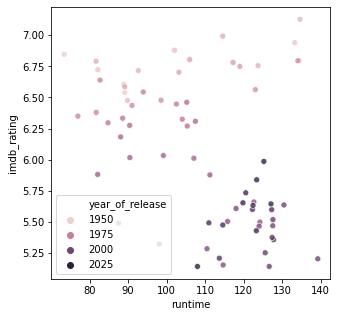

In [291]:
plt.figure(figsize=(5, 5))
sns.scatterplot(bolly_solved_data_df.runtime, bolly_solved_data_df.imdb_rating, hue = bolly_solved_data_df.year_of_release, sizes=(30, 30), alpha=0.8);

**With scatter we could see that there are some apparent clusters but we fail to mark them and tried the same with bar. But provided a very erratic graph almost like a barcode. So, this bar diagram is of little or no value to us.**

In [292]:
runtime_mean = bolly_solved_data_df['runtime']

In [293]:
imdb_rating_mean = bolly_solved_data_df['imdb_rating']

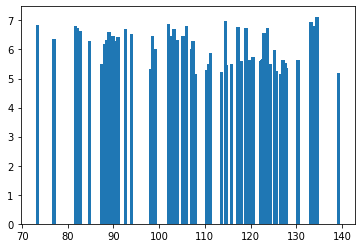

In [294]:
plt.bar(runtime_mean, imdb_rating_mean );

In [295]:
bolly_full_data_df

,imdb_id,title_y,original_title,year_of_release,runtime,genres,imdb_rating,imdb_votes,story,summary,actors,release_date,wins,nominations
0,tt8291224,Uri: The Surgical Strike,Uri: The Surgical Strike,2019,138.0,Action|Drama|War,8.4,35112.0,Divided over five chapters the film chronicle...,Indian army special forces execute a covert op...,Vicky Kaushal|Paresh Rawal|Mohit Raina|Yami Ga...,11 January 2019 (USA),4,0.0
1,tt9472208,Battalion 609,Battalion 609,2019,131.0,War,4.1,73.0,The story revolves around a cricket match betw...,The story of Battalion 609 revolves around a c...,Vicky Ahuja|Shoaib Ibrahim|Shrikant Kamat|Elen...,11 January 2019 (India),0,0.0
2,tt6986710,The Accidental Prime Minister,The Accidental Prime Minister,2019,112.0,Biography|Drama,6.1,5549.0,Based on the memoir by Indian policy analyst S...,Explores Manmohan Singh's tenure as the Prime ...,Anupam Kher|Akshaye Khanna|Aahana Kumra|Atul S...,11 January 2019 (USA),0,0.0
3,tt8108208,Why Cheat India,Why Cheat India,2019,121.0,Crime|Drama,6.0,1891.0,The movie focuses on existing malpractices in ...,The movie focuses on existing malpractices in ...,Emraan Hashmi|Shreya Dhanwanthary|Snighdadeep ...,18 January 2019 (USA),0,0.0
4,tt6028796,Evening Shadows,Evening Shadows,2018,102.0,Drama,7.3,280.0,While gay rights and marriage equality has bee...,Under the 'Evening Shadows' truth often plays...,Mona Ambegaonkar|Ananth Narayan Mahadevan|Deva...,11 January 2019 (India),17,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4325,tt0268614,Samadhi,Samadhi,1950,165.0,Drama,6.1,21.0,The story is based on the true incident at INA...,The story is based on the true incident at INA...,Ashok Kumar|Nalini Jaywant|Kuldip Kaur|Shyam|M...,_,0,0.0
4326,tt0244182,Sangram,Sangram,1950,139.0,Drama,6.2,20.0,After the death of his wife a policeman fails...,After the death of his wife a policeman fails...,Ashok Kumar|Nalini Jaywant|Nawab|Sajjan|Tiwari...,_,0,0.0
4327,tt0269826,Melody,Sargam,1950,135.0,Drama|Family,6.8,21.0,_,Add a Plot »,Raj Kapoor|Rehana|Om Prakash|David Abraham|Rad...,4 February 1957 (Iran),0,0.0
4328,tt0243555,Sheesh Mahal,Sheesh Mahal,1950,144.0,Drama,7.0,13.0,Thakur Jaspal Singh lives in the prestigious a...,Thakur Jaspal Singh lives in the prestigious a...,Sohrab Modi|Naseem Banu|Pushpa Hans|Nigar Sult...,_,0,0.0


**We find out some of the most rated movies of bollywood.**

In [296]:
bolly_most_rated_movie_df  = bolly_full_data_df.iloc[:,:8].sort_values('imdb_rating',ascending=False)

In [297]:
bolly_most_rated_movie_df.head(10)

,imdb_id,title_y,original_title,year_of_release,runtime,genres,imdb_rating,imdb_votes
41,tt8897986,Family of Thakurganj,Family of Thakurganj,2019,127.0,Action|Drama,9.4,895.0
4269,tt2403201,Humsafar,Humsafar,2011,35.0,Drama|Romance,9.0,2968.0
62,tt8108206,Saand Ki Aankh,Saand Ki Aankh,2019,146.0,Biography|Drama,8.9,1902.0
3615,tt0066763,Anand,Anand,1971,122.0,Drama|Musical,8.8,23953.0
3442,tt0156504,Ek Anek Aur Ekta,Ek Anek Aur Ekta,1974,7.0,Animation|Short,8.8,41.0
1443,tt0402178,Final Solution,Final Solution,2004,218.0,Documentary,8.7,333.0
1687,tt0259534,Ramayana: The Legend of Prince Rama,Ramayana: The Legend of Prince Rama,1992,170.0,Action|Adventure|Animation,8.7,1310.0
58,tt9378950,Ghost,Ghost,2019,130.0,Horror|Thriller,8.7,1379.0
3587,tt0215911,Koshish,Koshish,1972,125.0,Drama,8.6,1323.0
192,tt4640206,Sachin,Sachin,2017,138.0,Documentary|Sport,8.6,7239.0


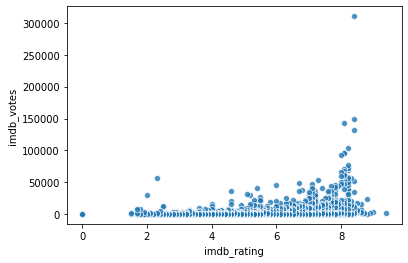

In [298]:
sns.scatterplot(bolly_most_rated_movie_df.imdb_rating, bolly_most_rated_movie_df.imdb_votes, alpha=0.8);

**We get to see the winning and the most nominated actors in bollywood.**

In [299]:
#actor nomination
bolly_actor_data_df = bolly_full_data_df[['imdb_id','title_y','actors' , 'wins' , 'nominations']].sort_values('wins',ascending=False)

In [300]:
bolly_actor_data_df

,imdb_id,title_y,actors,wins,nominations
916,tt1187043,3 Idiots,Aamir Khan|Madhavan|Sharman Joshi|Kareena Kapo...,57,0.0
363,tt3735246,Bajirao Mastani,Ranveer Singh|Deepika Padukone|Priyanka Chopra...,53,0.0
614,tt2356180,Bhaag Milkha Bhaag,Farhan Akhtar|Sonam Kapoor|Pavan Malhotra|Art ...,52,0.0
882,tt1620719,Fearless,Salman Khan|Sonakshi Sinha|Sonu Sood|Arbaaz Kh...,50,0.0
713,tt2082197,Barfi!,Ranbir Kapoor|Priyanka Chopra|Ileana D'Cruz|Sa...,50,0.0
...,...,...,...,...,...
1928,tt0338960,Ek Tha Raja,Aditya Pancholi|Sunil Shetty|Saif Ali Khan|Nee...,0,0.0
1929,tt0151090,Jaan,Ajay Devgn|Twinkle Khanna|Amrish Puri|Rakhee G...,0,0.0
1930,tt0447196,Himmatvar,Arun Bakshi|Gajendra Chouhan|Dharmendra|Srilek...,0,0.0
1931,tt0112916,Dushmani: A Violent Love Story,Sunny Deol|Jackie Shroff|Manisha Koirala|Deept...,0,0.0


In [301]:
bolly_actor_data_df.head(10) 

,imdb_id,title_y,actors,wins,nominations
916,tt1187043,3 Idiots,Aamir Khan|Madhavan|Sharman Joshi|Kareena Kapo...,57,0.0
363,tt3735246,Bajirao Mastani,Ranveer Singh|Deepika Padukone|Priyanka Chopra...,53,0.0
614,tt2356180,Bhaag Milkha Bhaag,Farhan Akhtar|Sonam Kapoor|Pavan Malhotra|Art ...,52,0.0
882,tt1620719,Fearless,Salman Khan|Sonakshi Sinha|Sonu Sood|Arbaaz Kh...,50,0.0
713,tt2082197,Barfi!,Ranbir Kapoor|Priyanka Chopra|Ileana D'Cruz|Sa...,50,0.0
593,tt2203308,Aashiqui 2,Aditya Roy Kapoor|Shraddha Kapoor|Shaad Randhawa|,47,0.0
1635,tt0234000,Kaho Naa... Pyaar Hai,Hrithik Roshan|Ameesha Patel|Anupam Kher|Dalip...,45,0.0
1230,tt0375611,Black,Amitabh Bachchan|Rani Mukerji|Shernaz Patel|Ay...,44,0.0
1115,tt1024943,Om Shanti Om,Shah Rukh Khan|Arjun Rampal|Kiron Kher|Shreyas...,35,0.0
812,tt1839596,Rockstar,Ranbir Kapoor|Nargis Fakhri|Shammi Kapoor|Kumu...,34,0.0


**Here we calculate the number of wins of each individual actors.**

In [302]:
bolly_actor_data_single_actor_df = pd.DataFrame()
count = 0
for i, row in bolly_actor_data_df.iterrows():
    actors = bolly_actor_data_df.at[i, 'actors'].split('|')
    for actor in actors:
        count += 1
        bolly_actor_data_single_actor_df.at[count, 'imdb_id'] = bolly_actor_data_df.at[i, 'imdb_id']
        bolly_actor_data_single_actor_df.at[count, 'title_y'] = bolly_actor_data_df.at[i, 'title_y']
        bolly_actor_data_single_actor_df.at[count, 'wins'] = bolly_actor_data_df.at[i, 'wins']
        bolly_actor_data_single_actor_df.at[count, 'nominations'] = bolly_actor_data_df.at[i, 'nominations']
        bolly_actor_data_single_actor_df.at[count, 'actor'] = actor

In [303]:
bolly_actor_data_single_actor_df

,imdb_id,title_y,wins,nominations,actor
1,tt1187043,3 Idiots,57.0,0.0,Aamir Khan
2,tt1187043,3 Idiots,57.0,0.0,Madhavan
3,tt1187043,3 Idiots,57.0,0.0,Sharman Joshi
4,tt1187043,3 Idiots,57.0,0.0,Kareena Kapoor
5,tt1187043,3 Idiots,57.0,0.0,Boman Irani
...,...,...,...,...,...
50392,tt0112916,Dushmani: A Violent Love Story,0.0,0.0,Amrit Pal
50393,tt0112916,Dushmani: A Violent Love Story,0.0,0.0,Tinnu Verma
50394,tt0112916,Dushmani: A Violent Love Story,0.0,0.0,Pradeep Singh Rawat
50395,tt0112916,Dushmani: A Violent Love Story,0.0,0.0,


In [304]:
bolly_actor_data_single_actor_df.sort_values('wins',ascending = False)

,imdb_id,title_y,wins,nominations,actor
1,tt1187043,3 Idiots,57.0,0.0,Aamir Khan
9,tt1187043,3 Idiots,57.0,0.0,Parikshat Sahni
2,tt1187043,3 Idiots,57.0,0.0,Madhavan
15,tt1187043,3 Idiots,57.0,0.0,
14,tt1187043,3 Idiots,57.0,0.0,Mukund Bhatt
...,...,...,...,...,...
24718,tt0147036,Masoom,0.0,0.0,
24719,tt2100612,Return of Mr. Superman,0.0,0.0,Paidi Jairaj
24720,tt2100612,Return of Mr. Superman,0.0,0.0,Sheila Ramani
24721,tt2100612,Return of Mr. Superman,0.0,0.0,Naazi


In [305]:
bolly_actor_data_single_actor_df[bolly_actor_data_single_actor_df['wins'] >= 1].groupby(['actor']).count().sort_values(by = ['imdb_id'], ascending = False).head(30)

,imdb_id,title_y,wins,nominations
actor,,,,
,946,946,946,946
Anupam Kher,57,57,57,57
Amitabh Bachchan,52,52,52,52
Om Puri,50,50,50,50
Naseeruddin Shah,45,45,45,45
Shah Rukh Khan,43,43,43,43
Amrish Puri,41,41,41,41
Ajay Devgn,40,40,40,40
Paresh Rawal,39,39,39,39


In [306]:
bolly_actor_data_single_actor_df.groupby(['actor']).sum().sort_values('wins',ascending = False)

,wins,nominations
actor,,
,4415.0,765.0
Shah Rukh Khan,442.0,37.0
Anupam Kher,339.0,50.0
Amitabh Bachchan,304.0,74.0
Deepika Padukone,292.0,11.0
...,...,...
Arup Ganguli,0.0,0.0
Michael Maloney,0.0,0.0
Michael Joseph,0.0,0.0


**We capture the market share of most released genres each year in bollywood.**

In [307]:
#genre , year of release , market share
bolly_market_share_df = bolly_full_data_df[['year_of_release','genres' , 'wins' , 'nominations']].sort_values('year_of_release',ascending=False)

In [308]:
bolly_market_share_df.head(10)

,year_of_release,genres,wins,nominations
72,\N,Comedy|Drama,0,0.0
671,\N,Drama,0,0.0
0,2019,Action|Drama|War,4,0.0
59,2019,Comedy,0,0.0
57,2019,Crime|Drama|Romance,0,0.0
56,2019,Action|Drama,0,0.0
55,2019,Action|Drama|Romance,0,0.0
54,2019,Comedy|Drama|Romance,0,0.0
53,2019,Crime|Drama,0,0.0
52,2019,Comedy|Romance,0,0.0


In [309]:
#imdb_ratings , imdb_votes wins nominations
bolly_best_movie_data_df = bolly_full_data_df[['imdb_rating','title_y','imdb_votes' , 'wins' , 'nominations']].sort_values(['wins', 'nominations', 'imdb_votes', 'imdb_rating'],ascending=False)

In [310]:
bolly_best_thirty_movie_data_df = bolly_best_movie_data_df.head(30)

In [311]:
bolly_best_thirty_movie_data_df

,imdb_rating,title_y,imdb_votes,wins,nominations
916,8.4,3 Idiots,310481.0,57,0.0
363,7.2,Bajirao Mastani,29141.0,53,0.0
614,8.2,Bhaag Milkha Bhaag,56205.0,52,0.0
713,8.1,Barfi!,70443.0,50,0.0
882,6.3,Fearless,25794.0,50,0.0
593,7.0,Aashiqui 2,24878.0,47,0.0
1635,6.9,Kaho Naa... Pyaar Hai,12566.0,45,0.0
1230,8.2,Black,31658.0,44,0.0
1115,6.7,Om Shanti Om,35974.0,35,0.0
812,7.7,Rockstar,35757.0,34,0.0


**We use scatter diagram to find out the relationship between wins and ibdb_ratings of best thirty bollywood movies.**

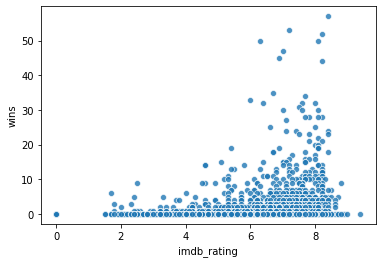

In [312]:
sns.scatterplot(bolly_best_movie_data_df.imdb_rating, bolly_best_movie_data_df.wins, alpha=0.8);

**We use agglomerative clustering here. The characteristics of Agglomerative clustering are as follows:-**

**a)Each data point is assigned as a single cluster.**

**b)Determine the distance measurement and calculate the distance matrix.**
 
**c)Determine the linkage criteria to merge the clusters.**
 
**d)Update the distance matrix**.

**e)Repeat the process until every data point become one cluster.**

**We use it here to get a better view of the scatter plot visualized above.**

In [313]:
from sklearn.cluster import KMeans, AgglomerativeClustering, AffinityPropagation #For clustering

def doAgglomerative(X, nclust=2):
    model = AgglomerativeClustering(n_clusters=nclust, affinity = 'euclidean', linkage = 'ward')
    clust_labels1 = model.fit_predict(X)
    return (clust_labels1)

wh1 = bolly_best_movie_data_df[['imdb_rating', 'wins']]
clust_labels1 = doAgglomerative(wh1, 2)
agglomerative = pd.DataFrame(clust_labels1)
wh1.insert((wh1.shape[1]),'agglomerative',agglomerative)

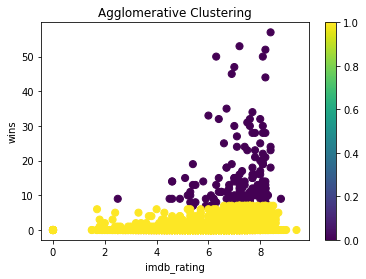

In [314]:
#Plot the clusters obtained using Agglomerative clustering or Hierarchical clustering
fig = plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter(wh1['imdb_rating'],wh1['wins'],
                     c=agglomerative[0],s=50)
ax.set_title('Agglomerative Clustering')
ax.set_xlabel('imdb_rating')
ax.set_ylabel('wins')
plt.colorbar(scatter)

**We even tried to get a better view with the help of histogram but failed to get so.**

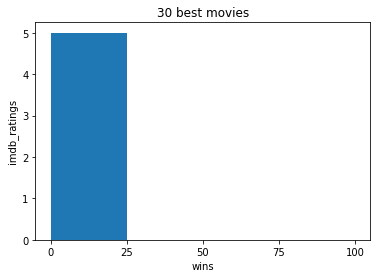

In [315]:
from matplotlib import pyplot as plt
import numpy as np
fig,ax = plt.subplots(1,1)
a = np.array([0,2,4,6,8])
ax.hist(a, bins = [0,25,50,75,100])
ax.set_title("30 best movies")
ax.set_xticks([0,25,50,75,100])
ax.set_xlabel('wins')
ax.set_ylabel('imdb_ratings')
plt.show()

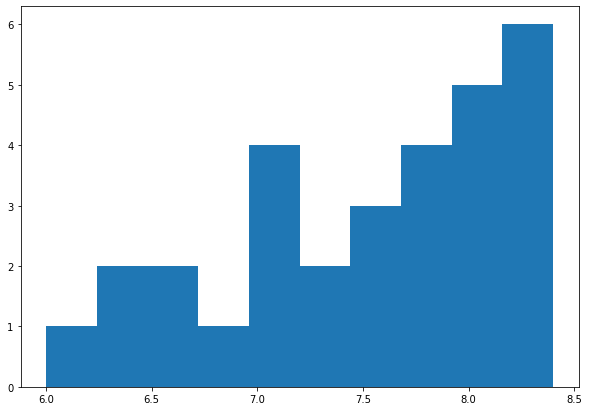

In [316]:

from matplotlib import pyplot as plt 
import numpy as np 
# rating vs frequency of rating
# Creating histogram 
fig, ax = plt.subplots(figsize =(10,7)) 
# ax.hist(a, bins = [0, 25, 50, 75, 100]) 
ax.hist(bolly_best_thirty_movie_data_df.imdb_rating) 
  
# Show plot 
plt.show() 


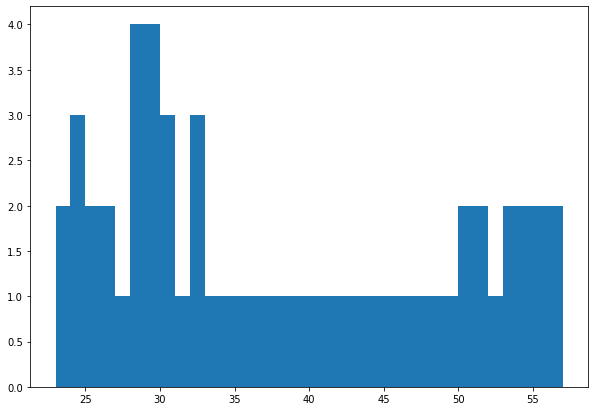

array([23, 24, 25, 27, 28, 30, 31, 32, 33, 34, 35, 44, 45, 47, 50, 52, 53,
       57])

In [317]:
from matplotlib import pyplot as plt 
import numpy as np 
# rating vs frequency of rating
# Creating histogram 
fig, ax = plt.subplots(figsize =(10,7)) 
# ax.hist(a, bins = [0, 25, 50, 75, 100]) 
ax.hist(bolly_best_thirty_movie_data_df.wins, bins = bolly_best_thirty_movie_data_df.wins.sort_values(ascending=True).unique())
  
# Show plot 
plt.show() 
bolly_best_thirty_movie_data_df.wins.sort_values(ascending=True).unique()


In [318]:
import jovian

In [319]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "sohinidas1092/sixty-nine-years-of-bollywood" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ml/sohinidas1092/sixty-nine-years-of-bollywood


'https://jovian.ml/sohinidas1092/sixty-nine-years-of-bollywood'

## Asking and Answering Questions



**1. Is there any relationship between imdb_rating , imdb_votes and movie name?**

**Yes there is a positive relationship between ratings , votes and a movie. We can always refer the most rated movies as they are highly watchable.**

**In the range around 8.0 we can see a sudden spike which tells us that within this range, people liked the movie so much that they felt compelled to give it a vote which shows a psychological pattern where liking something beyond a certain threshold actually helps people take a definitive action towards it.**

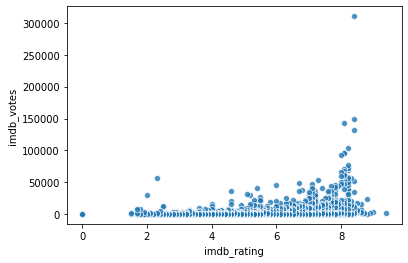

In [320]:
sns.scatterplot(bolly_most_rated_movie_df.imdb_rating, bolly_most_rated_movie_df.imdb_votes, alpha=0.8);

**2. Who are the most winned and nominated actors of bollywood?**

In [321]:
bolly_actor_data_single_actor_df.groupby(['actor']).sum().sort_values('wins',ascending = False)

,wins,nominations
actor,,
,4415.0,765.0
Shah Rukh Khan,442.0,37.0
Anupam Kher,339.0,50.0
Amitabh Bachchan,304.0,74.0
Deepika Padukone,292.0,11.0
...,...,...
Arup Ganguli,0.0,0.0
Michael Maloney,0.0,0.0
Michael Joseph,0.0,0.0


**3. Is there any correlation between runtime and year_of_release?**

   **No. We can't find any such correlation.**

In [322]:
bolly_solved_data_df

,year_of_release,runtime,imdb_rating,imdb_votes,wins,nominations
0,1950,89.133333,6.540000,23.400000,0.000000,0.000000
1,1951,73.411765,6.847059,238.882353,0.000000,0.058824
2,1952,133.235294,6.941176,84.235294,0.176471,0.058824
3,1953,88.888889,6.605556,130.222222,0.388889,0.055556
4,1954,82.136364,6.722727,108.454545,0.863636,0.045455
...,...,...,...,...,...,...
65,2015,119.800000,5.653333,6414.857143,2.504762,0.114286
66,2016,127.074468,5.644681,6941.595745,2.010638,0.244681
67,2017,123.364583,5.838542,3939.354167,1.427083,0.239583
68,2018,125.227848,5.986076,6102.708861,2.417722,0.265823


**4. Is there any dependency of genres with respect to year_of_release with market share(in terms of wins and nominations)?**
 
 **No we can't find any such.**

In [323]:
bolly_market_share_df = bolly_full_data_df[['year_of_release','genres' , 'wins' , 'nominations']].sort_values('year_of_release',ascending=False)

In [324]:
bolly_market_share_df

,year_of_release,genres,wins,nominations
72,\N,Comedy|Drama,0,0.0
671,\N,Drama,0,0.0
0,2019,Action|Drama|War,4,0.0
59,2019,Comedy,0,0.0
57,2019,Crime|Drama|Romance,0,0.0
...,...,...,...,...
4319,1950,Musical|Romance,0,0.0
4317,1950,Comedy|Romance,0,0.0
4316,1950,Drama|Family,0,0.0
4315,1950,Drama|Romance,0,0.0


**5. Can we show a relationship between imdb rating , imdb votes , wins , nominations?**

**Yes. We can definitely show the positive relation between the above columns.**

In [325]:
bolly_best_movie_data_df = bolly_full_data_df[['imdb_rating','title_y','imdb_votes' , 'wins' , 'nominations']].sort_values(['wins', 'nominations', 'imdb_votes', 'imdb_rating'],ascending=False)

In [326]:
bolly_best_movie_data_df

,imdb_rating,title_y,imdb_votes,wins,nominations
916,8.4,3 Idiots,310481.0,57,0.0
363,7.2,Bajirao Mastani,29141.0,53,0.0
614,8.2,Bhaag Milkha Bhaag,56205.0,52,0.0
713,8.1,Barfi!,70443.0,50,0.0
882,6.3,Fearless,25794.0,50,0.0
...,...,...,...,...,...
331,0.0,Ek Kahani Julie Ki,0.0,0,0.0
407,0.0,I Love Desi,0.0,0,0.0
474,0.0,Dee Saturday Night,0.0,0,0.0
481,0.0,Anuradha,0.0,0,0.0


**6. What are the best thirty 'must watch movies' in terms of votes , wins and ratings?**

In [327]:
bolly_best_thirty_movie_data_df

,imdb_rating,title_y,imdb_votes,wins,nominations
916,8.4,3 Idiots,310481.0,57,0.0
363,7.2,Bajirao Mastani,29141.0,53,0.0
614,8.2,Bhaag Milkha Bhaag,56205.0,52,0.0
713,8.1,Barfi!,70443.0,50,0.0
882,6.3,Fearless,25794.0,50,0.0
593,7.0,Aashiqui 2,24878.0,47,0.0
1635,6.9,Kaho Naa... Pyaar Hai,12566.0,45,0.0
1230,8.2,Black,31658.0,44,0.0
1115,6.7,Om Shanti Om,35974.0,35,0.0
812,7.7,Rockstar,35757.0,34,0.0


In [328]:
import jovian

In [329]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "sohinidas1092/sixty-nine-years-of-bollywood" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ml/sohinidas1092/sixty-nine-years-of-bollywood


'https://jovian.ml/sohinidas1092/sixty-nine-years-of-bollywood'

## Inferences and Conclusion

Our main objective behind this project was to gauge any relation between imdb votes and ratings (i.e. audience poll) and awards (i.e. expert opinions) and if possible, to list the the best movies of this period (1950-2019) for any newbie in Bolly-watching. Although we could list them in an almost unbiased fashion with the help of ordering by this list of criteria, i.e. wins, nominations, imdb_votes, imdb_rating, we fail to showcase the older movies in this list just because IMDB is a much more modern phenomenon and seems like people don't go back in time to rate the old good stuff, from this analysis. Some more inferences are as follows:
1. There is a tight coupling between the audience choice and the awards. They may influence each other, like a very popular movie may fetch more awards just to please the audience or a good review may draw more people to certain aesthetic bias, but that is beyond the scope of this project.
2. We see there are no apparent correlation between the runtime or duration of a movie with respect to it year of release. This also means that if we pick a random film from the 60's, the duration of it won't vary much from any typical sample made in the last 5 years.

In [330]:
import jovian

In [331]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "sohinidas1092/sixty-nine-years-of-bollywood" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ml/sohinidas1092/sixty-nine-years-of-bollywood


'https://jovian.ml/sohinidas1092/sixty-nine-years-of-bollywood'

## References and Future Work

TODO

In [332]:
import jovian

In [333]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "sohinidas1092/sixty-nine-years-of-bollywood" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ml/sohinidas1092/sixty-nine-years-of-bollywood


'https://jovian.ml/sohinidas1092/sixty-nine-years-of-bollywood'